# Basic plotting of ICON data

In this notebook, we explain how to make some basic plots of ICON data using  pyicon, a python based post-processing toolbox for ICON.

We assume that you have some basic knowledge about xarray, how to load data with it and how to select time and depth / height slices.

## Some stuff for debugging

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# temporarily necessary to ignore some warnings
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [3]:
import sys
# sys.path.append('~/pyicon/')
sys.path = ['~/pyicon']+sys.path
sys.path

['~/pyicon',
 '/home/m/m300977/pyicon/doc/Notebooks',
 '/home/m/m300977/pyicon/doc/Notebooks',
 '/home/m/m300977/pyicon',
 '/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python39.zip',
 '/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9',
 '/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/lib-dynload',
 '',
 '/home/m/m300977/.local/lib/python3.9/site-packages',
 '/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages']

## Loading necessary modules

First, we import necessary modules where we use `pyicon` for plotting, `xarray` for loading data and `numpy` for basic calculations.

In [4]:
import pyicon as pyic
import xarray as xr
import numpy as np

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----accessor
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----accessor
-----view
-----quickplots
-----quickplots


## Loading the data

In [5]:
run = 'sfx0080'
ds_3d = xr.open_dataset(f'/home/m/m300602/pyicon/example_data/{run}/{run}_oce_P1M_3d_20100101.nc')
ds_2d = xr.open_dataset(f'/home/m/m300602/pyicon/example_data/{run}/{run}_oce_P1M_2d_20100101.nc')

## Basic horizontal plotting

### Just plotting

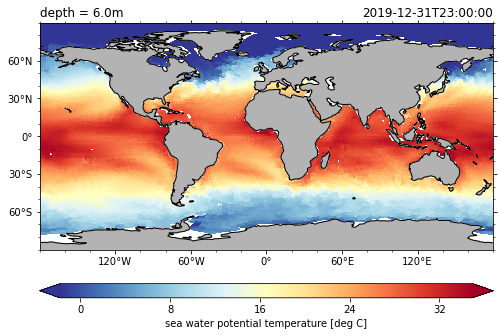

In [6]:
ds_3d.to.isel(time=-1,depth=0).pyic.plot()

In [19]:
ds_3d.to.isel(time=-1,depth=0).pyic.plot?


Signature:
pyic.plot(
    data,
    ax=None,
    cax=None,
    asp=None,
    mask_data=True,
    logplot=False,
    lon_reg=None,
    lat_reg=None,
    clim='auto',
    cmap='auto',
    conts=None,
    contfs=None,
    xlabel='',
    ylabel='',
    cbar_str='auto',
    cbar_pos='bottom',
    title_right='auto',
    title_left='auto',
    title_center='auto',
    projection='pc',
    coastlines_color='k',
    land_facecolor='0.7',
    gname='auto',
    fpath_tgrid='auto',
    plot_method='nn',
    res=0.3,
    fpath_ckdtree='auto',
    coordinates='clat clon',
    fpath_ckdgree='auto',
    lonlat_for_mask=False,
)
Docstring: <no docstring>
File:      ~/pyicon/pyicon/pyicon_plotting.py
Type:      function


### Select a region

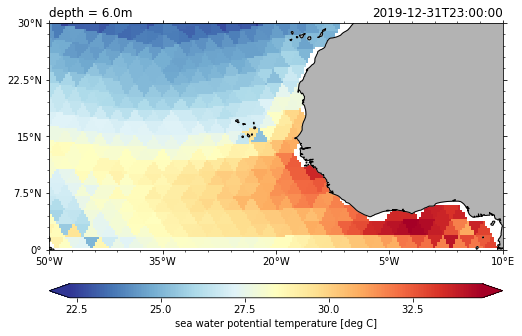

In [7]:
ds_3d.to.isel(time=-1,depth=0).pyic.plot(lon_reg=[-50,10], lat_reg=[0,30])

### Change how things look

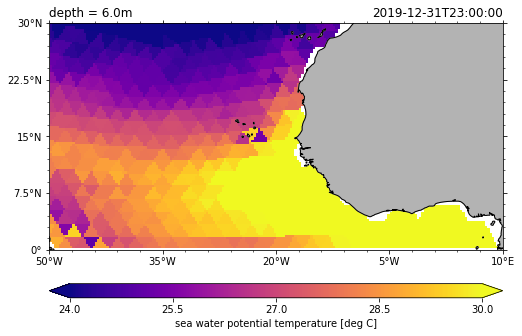

In [8]:
ds_3d.to.isel(time=-1,depth=0).pyic.plot(
    lon_reg=[-50,10], lat_reg=[0,30],
    clim=[24,30], cmap='plasma', #conts=np.linspace(24,40),
)

### Change projection

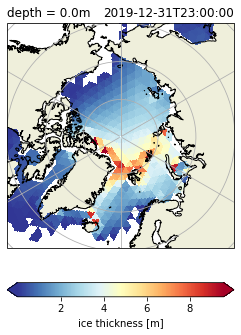

In [9]:
ds_2d.hi.isel(time=-1,lev=0).pyic.plot(projection='np')

### Make continents transparent

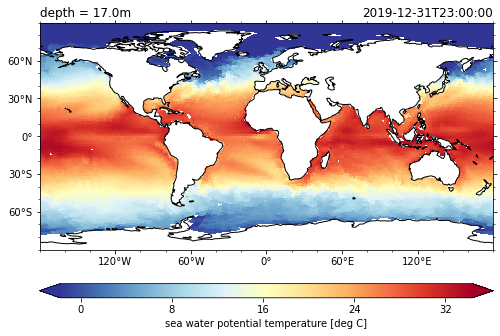

In [10]:
ds_3d.to.isel(time=-1).sel(depth=20., method='nearest').pyic.plot(land_facecolor='none')

### Plot on the original grid

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


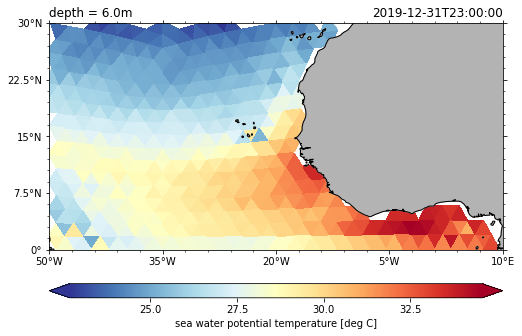

In [11]:
ds_3d.to.isel(time=-1,depth=0).pyic.plot(lon_reg=[-50,10], lat_reg=[0,30], plot_method='tgrid')

## Plotting meridional sections

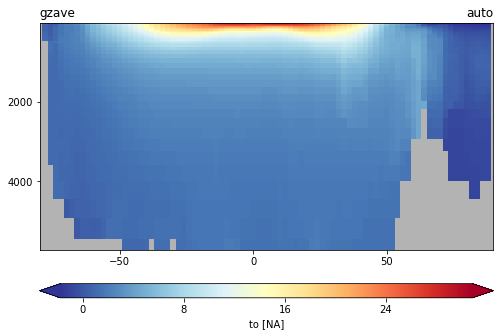

In [12]:
ds_3d.to.isel(time=-1).pyic.plot_sec(section='gzave',
                                     fpath_fx='/home/m/m300602/work/icon/grids/r2b4_oce_r0004/r2b4_oce_r0004_L40_fx.nc',
                                     res=2.0,)

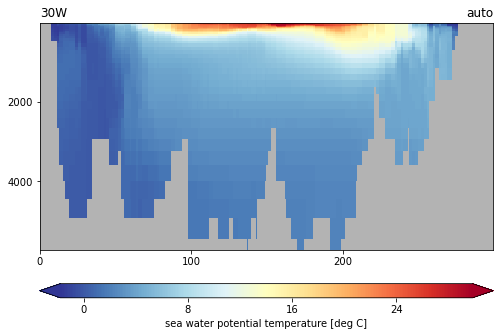

In [13]:
pyic.plot_sec(ds_3d.to.isel(time=-1), 
              section='30W', # only two options yet, 30W and 170W
             )

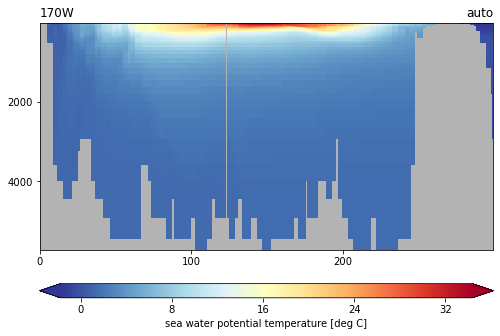

In [14]:
pyic.plot_sec(ds_3d.to.isel(time=-1), 
              section='170W', # only two options yet, 30W and 170W
             )

## Plotting zonal averages

### Global zonal average

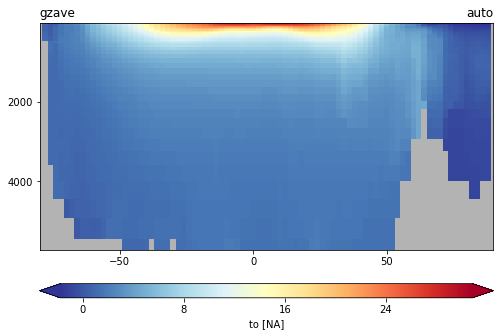

In [15]:
ds_3d.to.isel(time=-1).pyic.plot_sec(section='gzave',
                                     fpath_fx='/home/m/m300602/work/icon/grids/r2b4_oce_r0004/r2b4_oce_r0004_L40_fx.nc',
                                     res=2.0, # choose something >= 1.0 to avoid overprecision
                                    )

### Atlantic zonal average

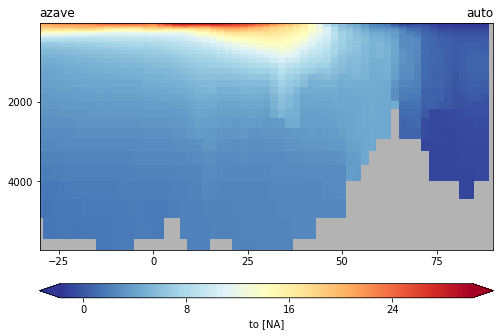

In [16]:
ds_3d.to.isel(time=-1).pyic.plot_sec(section='azave',
                                     fpath_fx='/home/m/m300602/work/icon/grids/r2b4_oce_r0004/r2b4_oce_r0004_L40_fx.nc',
                                     res=2.0, # choose something >= 1.0 to avoid overprecision
                                    )

### Indo-Pacific zonal average

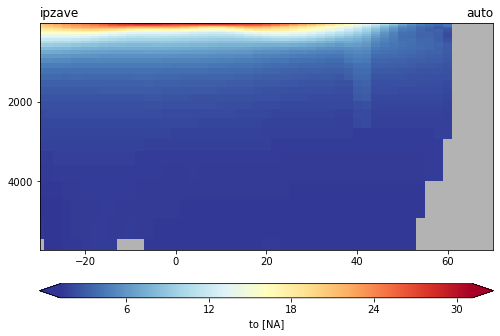

In [17]:
ds_3d.to.isel(time=-1).pyic.plot_sec(section='ipzave',
                                     fpath_fx='/home/m/m300602/work/icon/grids/r2b4_oce_r0004/r2b4_oce_r0004_L40_fx.nc',
                                     res=2.0, # choose something >= 1.0 to avoid overprecision
                                    )